# **House Price Prediction and Impacting Factors in England**

*This paper* 
>每个section添加下面的链接


| [1. Introduction](#1.-Introduction) | [2. Literature Review](#2.-Literature-Review) | [3. Research Question](#3.-Research-Question) | [4. Data](#4.-Data) | [5. Methodology](#5.-Methodology) | [6. Results and Discussion](#6.-Results-and-Discussion) | [7. Conclusion](#7.-Conclusion) | [Bibliography](#Bibliography) |

---

## 1. Introduction


house price prediction is regression problem
supervised learning

In [1]:
# Import time for measuring the execution time of the program
import time

start_time = time.time()

In [2]:
# Import the packages for data manipulation and processing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import statsmodels.api as sm
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split

pd.set_option("display.max_rows", 300)  # specifies number of rows to show
pd.options.display.float_format = (
    "{:40,.4f}".format
)  # specifies default number format to 4 decimal places
plt.style.use("ggplot")  # specifies that graphs should use ggplot styling
%matplotlib inline

## 2. Literature Review

## 3. Research Question

## 4. Data

The data is obtained from HM Land Registry Open Data, which contains house price paid data in England and Wales in 2021

### 4.1 Data Cleaning

add column headers, 
import dataset from
from the data info, it can be seen that the transaction unique identifier is object, which can be convert to integer transaction ID for further analysis

In [3]:
# Import the dataset
df = pd.read_csv("Data/Price_Paid_Data_2021.csv")
df

,Transaction_unique_identifier,Price,Date_of_Transfer,Postcode,Property_Type,Building_Age,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD_Category_Type
0,{C6209F5F-3182-295E-E053-6C04A8C0DDCC},270000,2021/3/11 0:00,CM18 7JN,T,N,F,23,NaN,CORNER MEADOW,NaN,HARLOW,HARLOW,ESSEX,A
1,{C6209F5F-3184-295E-E053-6C04A8C0DDCC},246000,2021/6/4 0:00,SS8 8JW,D,N,F,22,NaN,LIMETREE ROAD,NaN,CANVEY ISLAND,CASTLE POINT,ESSEX,A
2,{C6209F5F-3185-295E-E053-6C04A8C0DDCC},250000,2021/4/9 0:00,CM2 8QL,T,N,F,25,NaN,THE STREET,GALLEYWOOD,CHELMSFORD,CHELMSFORD,ESSEX,A
3,{C6209F5F-3186-295E-E053-6C04A8C0DDCC},660000,2021/5/26 0:00,CO6 1QU,D,N,F,3,NaN,GARDENERS ROW,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A
4,{C6209F5F-3187-295E-E053-6C04A8C0DDCC},567500,2021/4/9 0:00,SS6 9NS,D,N,F,6,NaN,SAXON CLOSE,NaN,RAYLEIGH,ROCHFORD,ESSEX,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944722,{CD5A9DCB-FAD5-310A-E053-6C04A8C00A1F},325000,2021/5/28 0:00,ME10 4AG,T,N,F,19,NaN,HONESTY CLOSE,NaN,SITTINGBOURNE,SWALE,KENT,A
944723,{CD5A9DCB-FAD8-310A-E053-6C04A8C00A1F},355000,2021/5/28 0:00,ME12 3TD,D,N,F,31,NaN,CHARLOCK DRIVE,MINSTER ON SEA,SHEERNESS,SWALE,KENT,A
944724,{CD5A9DCB-FAD9-310A-E053-6C04A8C00A1F},540000,2021/6/25 0:00,TN9 2NJ,D,N,F,93,NaN,JUDD ROAD,NaN,TONBRIDGE,TONBRIDGE AND MALLING,KENT,A
944725,{CD5A9DCB-FADA-310A-E053-6C04A8C00A1F},175000,2021/7/14 0:00,CT17 9PU,D,N,F,7,NaN,QUEENS AVENUE,NaN,DOVER,DOVER,KENT,A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944727 entries, 0 to 944726
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Transaction_unique_identifier  944727 non-null  object
 1   Price                          944727 non-null  int64 
 2   Date_of_Transfer               944727 non-null  object
 3   Postcode                       941896 non-null  object
 4   Property_Type                  944727 non-null  object
 5   Building_Age                   944727 non-null  object
 6   Tenure                         944727 non-null  object
 7   PAON                           944727 non-null  object
 8   SAON                           103127 non-null  object
 9   Street                         926258 non-null  object
 10  Locality                       360019 non-null  object
 11  Town/City                      944727 non-null  object
 12  District                       944727 non-nu

There are some house postcodes missing from the summary table, which will be excluded. And since only England data will be investigated, Wales data will be excluded.

In [5]:
# Drop rows with NA postcode
df = df.dropna(subset = ['Postcode']) 

# Drop rows with Wales Postcode
df = df[df.Postcode.str.startswith(('CF', 'LD', 'LL', 'NP', 'SA', 'SY')) == False]

df

,Transaction_unique_identifier,Price,Date_of_Transfer,Postcode,Property_Type,Building_Age,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD_Category_Type
0,{C6209F5F-3182-295E-E053-6C04A8C0DDCC},270000,2021/3/11 0:00,CM18 7JN,T,N,F,23,NaN,CORNER MEADOW,NaN,HARLOW,HARLOW,ESSEX,A
1,{C6209F5F-3184-295E-E053-6C04A8C0DDCC},246000,2021/6/4 0:00,SS8 8JW,D,N,F,22,NaN,LIMETREE ROAD,NaN,CANVEY ISLAND,CASTLE POINT,ESSEX,A
2,{C6209F5F-3185-295E-E053-6C04A8C0DDCC},250000,2021/4/9 0:00,CM2 8QL,T,N,F,25,NaN,THE STREET,GALLEYWOOD,CHELMSFORD,CHELMSFORD,ESSEX,A
3,{C6209F5F-3186-295E-E053-6C04A8C0DDCC},660000,2021/5/26 0:00,CO6 1QU,D,N,F,3,NaN,GARDENERS ROW,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A
4,{C6209F5F-3187-295E-E053-6C04A8C0DDCC},567500,2021/4/9 0:00,SS6 9NS,D,N,F,6,NaN,SAXON CLOSE,NaN,RAYLEIGH,ROCHFORD,ESSEX,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944722,{CD5A9DCB-FAD5-310A-E053-6C04A8C00A1F},325000,2021/5/28 0:00,ME10 4AG,T,N,F,19,NaN,HONESTY CLOSE,NaN,SITTINGBOURNE,SWALE,KENT,A
944723,{CD5A9DCB-FAD8-310A-E053-6C04A8C00A1F},355000,2021/5/28 0:00,ME12 3TD,D,N,F,31,NaN,CHARLOCK DRIVE,MINSTER ON SEA,SHEERNESS,SWALE,KENT,A
944724,{CD5A9DCB-FAD9-310A-E053-6C04A8C00A1F},540000,2021/6/25 0:00,TN9 2NJ,D,N,F,93,NaN,JUDD ROAD,NaN,TONBRIDGE,TONBRIDGE AND MALLING,KENT,A
944725,{CD5A9DCB-FADA-310A-E053-6C04A8C00A1F},175000,2021/7/14 0:00,CT17 9PU,D,N,F,7,NaN,QUEENS AVENUE,NaN,DOVER,DOVER,KENT,A


From all the available features, the most relevant factors are identified for building the prediction model, and the rest are excluded as they are missing, duplicate or redundant. The variables listed below are those that contribute to house price forecasting. It should be noticed that postcode is decided to represent property location rather than the other position information, which is because postcode is succinct and unique, and it will be convert to longitude and latittude in the later process.
- **Price**: stated sale price of the properties (*dependent variable*)
- **Date of Transfer**: date when the sale is finished, Year/Month/Day_Time (*independent variable*)
- **Postcode**: postcode of th properties (*independent variable*)
- **Property type**: D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other  (*independent variable*)
- **Building age**: the age of the property, Y = a newly built property, N = an established residential building (*independent variable*)
- **Tenure**: tenure of the properties, F = Freehold, L= Leasehold (*independent variable*)


In [6]:
df = df.drop([
        "Transaction_unique_identifier",
        "PAON",
        "SAON",
        "Street",
        "Locality",
        "Town/City",
        "District",
        "County",
        "PPD_Category_Type",],axis=1,)

df.head()

,Price,Date_of_Transfer,Postcode,Property_Type,Building_Age,Tenure
0,270000,2021/3/11 0:00,CM18 7JN,T,N,F
1,246000,2021/6/4 0:00,SS8 8JW,D,N,F
2,250000,2021/4/9 0:00,CM2 8QL,T,N,F
3,660000,2021/5/26 0:00,CO6 1QU,D,N,F
4,567500,2021/4/9 0:00,SS6 9NS,D,N,F


It could be seen that the data is still extremely large, using the entire dataset would be computationally challenging and significantly affect the program running and training time. To improve the time and training efficiency, only 50 thousand sets of data is selected. The data with na values is excluded, then the datasets will be randomly selected to avoid data bias and inequity.

In [7]:
df = df.dropna() 

In [8]:
np.random.seed(10)

df_subset = df.sample(n=50000)

df_subset

,Price,Date_of_Transfer,Postcode,Property_Type,Building_Age,Tenure
766120,72500,2021/4/28 0:00,TS12 2AL,T,N,F
513417,110000,2021/3/23 0:00,ST4 7EW,S,N,F
643478,261000,2021/3/4 0:00,PO1 3FT,F,N,L
834396,135000,2021/5/5 0:00,CO4 9YD,F,N,F
559621,370000,2021/8/6 0:00,CV5 9DW,S,N,F
...,...,...,...,...,...,...
239009,215000,2021/6/25 0:00,WA3 2XE,S,N,F
824155,90000,2021/4/26 0:00,S41 0BU,S,N,F
886556,328000,2021/9/23 0:00,M27 0FA,S,N,F
814395,360000,2021/6/24 0:00,DH8 9EE,O,N,F


### 4.2 Data Investigating and Pre-processing

In order to apply the data for establishing prediction model, pre-processing is required.

Firstly, 

The date of transaction is now represented as the number of months since January 1995 (the earliest month of transaction in our dataset), to simplify the representation of time by months only, instead of month and year.




In [9]:
# Transfer the date data to month data since 2021 Janurary
df_subset['Month'] = pd.DatetimeIndex(df_subset['Date_of_Transfer']).month 

# Drop the date of transfer column
df_subset = df_subset.drop(['Date_of_Transfer'], axis=1)

df_subset.head()

,Price,Postcode,Property_Type,Building_Age,Tenure,Month
766120,72500,TS12 2AL,T,N,F,4
513417,110000,ST4 7EW,S,N,F,3
643478,261000,PO1 3FT,F,N,L,3
834396,135000,CO4 9YD,F,N,F,5
559621,370000,CV5 9DW,S,N,F,8


Secondly, the postcode is replaced by latitudes and longitudes to indicate the

as the coordinate data is too large to contain, the data source and the manipulate processes are presented below.

 To capture geographical variation in housing prices more accurately, we decide to represent the address of the property in terms of latitudes and longitudes rather than postcodes. This is preferable to postcodes as neigh- bouring regions do not necessarily share similar postcodes (e.g. SW7 and W8). This process is automated through a Python script which looks up the postcode in a pre-compiled CSV file of London postcodes1, and returns the corresponding latitude and longitude.

In [10]:
# read UK coordinates file into pandas DataFrame. The data link is: http://download.geonames.org/export/zip/

GBcoords1 = pd.read_csv("https://raw.githubusercontent.com/joeylizh/DSSS_Assessment/main/GBcoords1.csv")
GBcoords2 = pd.read_csv("https://raw.githubusercontent.com/joeylizh/DSSS_Assessment/main/GBcoords2.csv")


In [11]:
# Concat the two coordinate file
frames = [GBcoords1, GBcoords2]

GBcoords = pd.concat(frames)

In [12]:
# Merge the latitude and longitude data into the datasets
df_subset  = df_subset.merge(GBcoords, on='Postcode', how='left')
df_subset

,Price,Postcode,Property_Type,Building_Age,Tenure,Month,Latitude,Longitude
0,72500,TS12 2AL,T,N,F,4,54.5575,-0.9597
1,110000,ST4 7EW,S,N,F,3,53.0079,-2.1951
2,261000,PO1 3FT,F,N,L,3,50.8005,-1.1029
3,135000,CO4 9YD,F,N,F,5,51.9100,0.9163
4,370000,CV5 9DW,S,N,F,8,52.4332,-1.5664
...,...,...,...,...,...,...,...,...
49995,215000,WA3 2XE,S,N,F,6,53.4695,-2.5806
49996,90000,S41 0BU,S,N,F,4,53.2294,-1.3998
49997,328000,M27 0FA,S,N,F,9,53.5005,-2.3537
49998,360000,DH8 9EE,O,N,F,6,54.8338,-1.8117


In [13]:
# Drop the rows without latitude and longitude values (latitude and longitude are consistent)
df_subset = df_subset.dropna(subset = ['Latitude']) 

# Drop the Postcode column
df_subset = df_subset.drop(['Postcode'], axis=1)

df_subset.head()

,Price,Property_Type,Building_Age,Tenure,Month,Latitude,Longitude
0,72500,T,N,F,4,54.5575,-0.9597
1,110000,S,N,F,3,53.0079,-2.1951
2,261000,F,N,L,3,50.8005,-1.1029
3,135000,F,N,F,5,51.9100,0.9163
4,370000,S,N,F,8,52.4332,-1.5664


The saved data above is the data link below, which contains latitude and longitude values without postcode column.

In [14]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49977 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          49977 non-null  int64  
 1   Property_Type  49977 non-null  object 
 2   Building_Age   49977 non-null  object 
 3   Tenure         49977 non-null  object 
 4   Month          49977 non-null  int64  
 5   Latitude       49977 non-null  float64
 6   Longitude      49977 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 3.1+ MB


Finally, 

Binary categorical variables (build & tenure) are represented using one binary digit (i.e. (Build) 0 = Old, 1 = New / (Tenure) 0 = Leasehold, 1 = Freehold), while property type is represented using three binary digits through the use of dummy coding [43] (i.e. 000 = Detached, 100 = Semi- detached, 010 = Terrace, 001 = Flat).

I want Old =0 and New =1 So we drop column "N" here

In [15]:
# Data of Building age is converted into Binary Data
df_one = pd.get_dummies(df_subset['Building_Age'])
 
# Binary Data is Concatenated into Dataframe
df_two = pd.concat((df_subset, df_one), axis=1)
 
# Column "Building_Age" is dropped
df_two = df_two.drop(['Building_Age'], axis=1)
 
# I want Old =0 and New =1 So we drop column "N" here
df_two = df_two.drop(["N"], axis=1)
 
# Rename the Column
df_numeric1 = df_two.rename(columns={"Y": "Building_Age"})
 
# Print the Result
df_numeric1

,Price,Property_Type,Tenure,Month,Latitude,Longitude,Building_Age
0,72500,T,F,4,54.5575,-0.9597,0
1,110000,S,F,3,53.0079,-2.1951,0
2,261000,F,L,3,50.8005,-1.1029,0
3,135000,F,F,5,51.9100,0.9163,0
4,370000,S,F,8,52.4332,-1.5664,0
...,...,...,...,...,...,...,...
49995,215000,S,F,6,53.4695,-2.5806,0
49996,90000,S,F,4,53.2294,-1.3998,0
49997,328000,S,F,9,53.5005,-2.3537,0
49998,360000,O,F,6,54.8338,-1.8117,0


Data of Tenure is converted into Binary Data by the same way
Leasehold =0 and Freehold =1 So drop column "L" here

In [16]:
# Data of Tenure is converted into Binary Data
df_three = pd.get_dummies(df_numeric1['Tenure'])
 
# Binary Data is Concatenated into Dataframe
df_four = pd.concat((df_numeric1, df_three), axis=1)
 
# Column "Tenure" is dropped
df_four = df_four.drop(['Tenure'], axis=1)
 
# Leasehold =0 and Freehold =1 So drop column "L" here
df_four = df_four.drop(["L"], axis=1)
 
# Rename the Column
df_numeric2 = df_four.rename(columns={"F": "Tenure"})
 
# Print the Result
df_numeric2

,Price,Property_Type,Month,Latitude,Longitude,Building_Age,Tenure
0,72500,T,4,54.5575,-0.9597,0,1
1,110000,S,3,53.0079,-2.1951,0,1
2,261000,F,3,50.8005,-1.1029,0,0
3,135000,F,5,51.9100,0.9163,0,1
4,370000,S,8,52.4332,-1.5664,0,1
...,...,...,...,...,...,...,...
49995,215000,S,6,53.4695,-2.5806,0,1
49996,90000,S,4,53.2294,-1.3998,0,1
49997,328000,S,9,53.5005,-2.3537,0,1
49998,360000,O,6,54.8338,-1.8117,0,1


The final step is to convert the property type, which contains five categories. Still deploy the same method but list the conversion of all the 5 categorical columns in dummy columns.  

In [17]:
df_cleaned = pd.get_dummies(df_numeric2, columns = ['Property_Type'])

df_cleaned

,Price,Month,Latitude,Longitude,Building_Age,Tenure,Property_Type_D,Property_Type_F,Property_Type_O,Property_Type_S,Property_Type_T
0,72500,4,54.5575,-0.9597,0,1,0,0,0,0,1
1,110000,3,53.0079,-2.1951,0,1,0,0,0,1,0
2,261000,3,50.8005,-1.1029,0,0,0,1,0,0,0
3,135000,5,51.9100,0.9163,0,1,0,1,0,0,0
4,370000,8,52.4332,-1.5664,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,215000,6,53.4695,-2.5806,0,1,0,0,0,1,0
49996,90000,4,53.2294,-1.3998,0,1,0,0,0,1,0
49997,328000,9,53.5005,-2.3537,0,1,0,0,0,1,0
49998,360000,6,54.8338,-1.8117,0,1,0,0,1,0,0


In [18]:
# check out the new dataFrame
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49977 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            49977 non-null  int64  
 1   Month            49977 non-null  int64  
 2   Latitude         49977 non-null  float64
 3   Longitude        49977 non-null  float64
 4   Building_Age     49977 non-null  uint8  
 5   Tenure           49977 non-null  uint8  
 6   Property_Type_D  49977 non-null  uint8  
 7   Property_Type_F  49977 non-null  uint8  
 8   Property_Type_O  49977 non-null  uint8  
 9   Property_Type_S  49977 non-null  uint8  
 10  Property_Type_T  49977 non-null  uint8  
dtypes: float64(2), int64(2), uint8(7)
memory usage: 2.2 MB


In [19]:
df_cleaned.describe()

,Price,Month,Latitude,Longitude,Building_Age,Tenure,Property_Type_D,Property_Type_F,Property_Type_O,Property_Type_S,Property_Type_T
count,"49,977.0000","49,977.0000","49,977.0000","49,977.0000","49,977.0000","49,977.0000","49,977.0000","49,977.0000","49,977.0000","49,977.0000","49,977.0000"
mean,"386,537.6663",5.5615,52.3336,-1.1943,0.0316,0.7857,0.2355,0.1603,0.0413,0.2721,0.2908
std,"1,249,951.1465",3.0204,1.1590,1.2550,0.1749,0.4103,0.4243,0.3669,0.1989,0.4450,0.4542
min,100.0000,1.0000,49.9144,-6.3115,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,"175,000.0000",3.0000,51.4331,-2.0964,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,"273,000.0000",6.0000,52.0967,-1.2407,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,"420,000.0000",8.0000,53.3791,-0.1946,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000
max,"130,500,000.0000",12.0000,55.7860,1.7551,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [20]:
df_cleaned.isnull().sum()

Price              0
Month              0
Latitude           0
Longitude          0
Building_Age       0
Tenure             0
Property_Type_D    0
Property_Type_F    0
Property_Type_O    0
Property_Type_S    0
Property_Type_T    0
dtype: int64

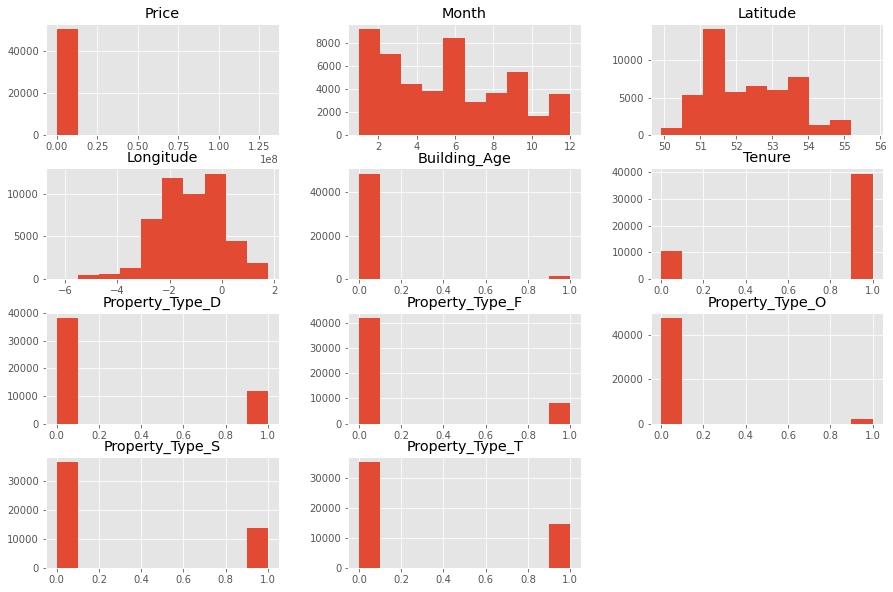

In [21]:
df_histogram = df_cleaned.hist(figsize = (15,10))

/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


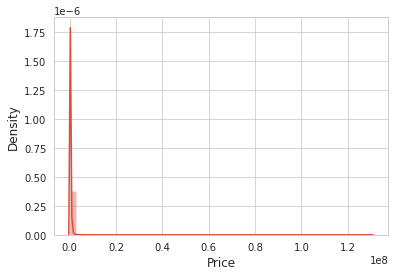

/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


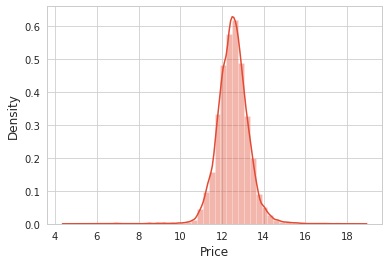

In [22]:
x = df_cleaned.Price
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()

Price_log = np.log(df_cleaned.Price)
x = Price_log
sns.distplot(x)
plt.show()

# Train['SalePrice_log'] = np.log(Train.SalePrice)
# x = Train.SalePrice_log
# sns.distplot(x)
# plt.show()

## 5. Methodology

### 5.1 Set Train Validation and Test Subsets

By default, train_test_split will split the data according to a 75:25 split. Other proportions can be specified, check out the documentation for details.
Remember that the split should be random in order to avoid selection bias. Here, we set random_state=100 to guarantee reproducibility.



In [23]:
X = df_cleaned.drop(['Price'], axis=1)
y = df_cleaned['Price']

print(X.shape)
print(y.shape)

(49977, 10)
(49977,)


Split your data into train, dev and test sets

In [24]:
# We apply train_test_split twice to obtain the three train, dev and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1024)

In [25]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34983, 10)
(7497, 10)
(7497, 10)


### 5.2 Multicollinearity Checking

In regression, `multicollinearity` emerges when two or more variables, which are highly correlated are included in a model. It can emerge even when each pair of variables involved are not colinear. For example, think of the four dummy variables relating to seasons in the `bike_rental_numeric` dataset.  

You can check the colinearity between attributes using a correlation matrix as below. Think of these two questions:

- **What can you get from this plot? For example, which pair of variables are highly correlated, and can you explain it?**
- **Can you use the correlation matrix to deal with multicolinearity, for example, by removing one of the two variables if their correlation is above 0.75?** (*Hint*: a short answer is NO)

Text(0.5, 1.0, 'Correlation Matrix')

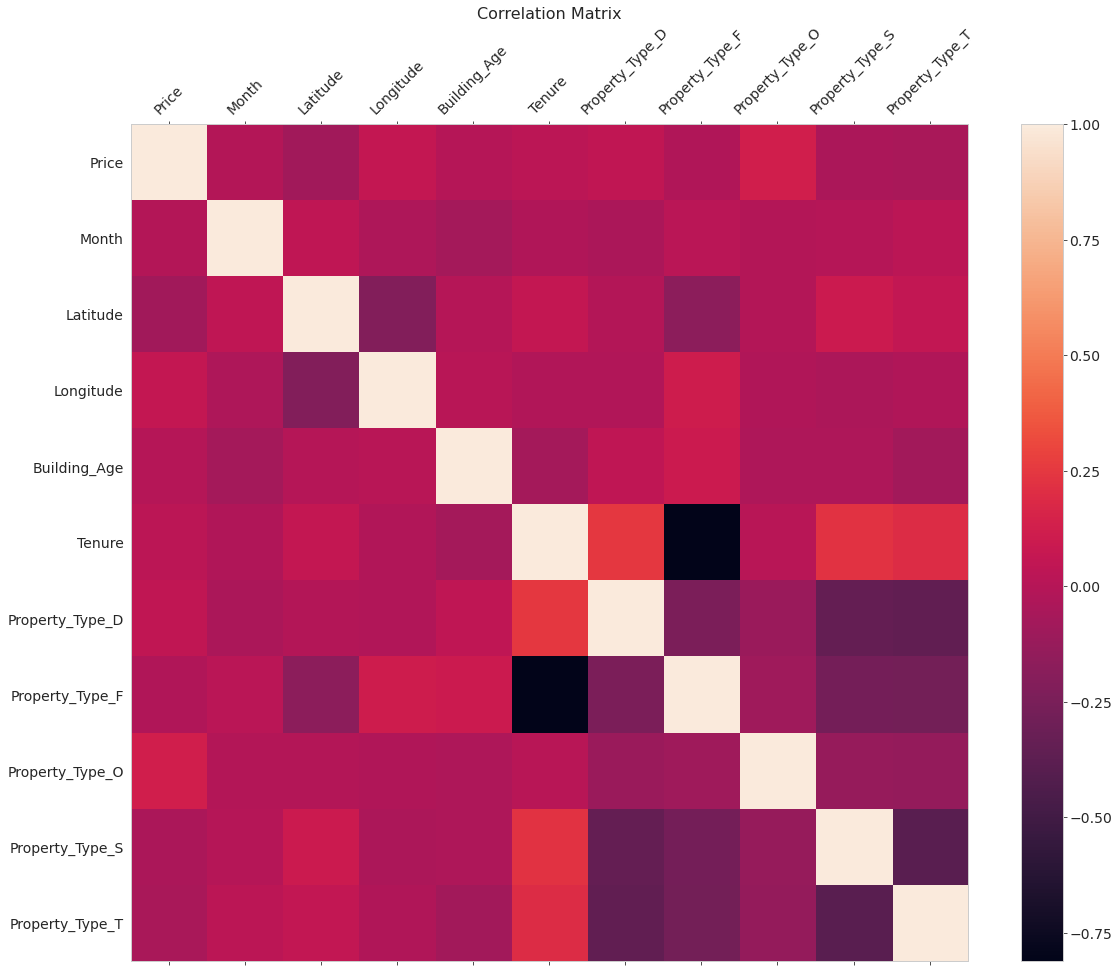

In [26]:
df = df_cleaned
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

### 5.3 Linear Regression with VIF


If in doubt, always start with a simple model. It is quicker to build and test. If it suffers from high bias, then try a more complicated machine learning model. 

The Variance Inflation Factor (VIF) is a measure of multicolinearity among predictors within a multiple regression task. It is the quotient of the variance in a model with multiple predictors by the variance of a model with a single predictor. More explanation of the theory can be found here.

Steps for using VIF to deal with multicolineartiy are:

Initialise L as the list of independent variables. (HINT: the response variable is not needed here)
Calculate the VIF for each variable in L. (HINT: the order of computing VIF is irrelevant).
If the highest VIF is larger than the threshold, remove the variable from the list L.
Repeat Step 2-3, until no VIF is larger than the threshold.
Return L.
Below is an example of using VIF on the bike_rental dataset. Note that the statsmodels package is used.

In [27]:
# VIF Calculation

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [28]:
# using VIF on the cleaned price paid dataset

train_x_VIF = drop_column_using_vif_(X_train, thresh=5)
print("The columns remaining after VIF selection are:")
print(train_x_VIF.columns)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Max VIF: inf
Dropping: Property_Type_D
Max VIF: 3.756829829272835
The columns remaining after VIF selection are:
Index(['Month', 'Latitude', 'Longitude', 'Building_Age', 'Tenure',
       'Property_Type_F', 'Property_Type_O', 'Property_Type_S',
       'Property_Type_T'],
      dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Now we can fit a linear regression model after dealing with the multicolinearity, and we will do it using the sklearn package.

Just like clustering analysis in sklearn, we will run the regression model using the .fit() function. Make sure you get the variables the right way around.

In [29]:
lr = LinearRegression()
lr.fit(X=train_x_VIF, y=y_train)

LinearRegression()

Now that we've created our fit, it's time to look at the structure of the model and how well it fits the data.

There are a number of ways to do this. In the first instance, as with any linear regression model, we want to get a grip on the coefficients and intercept of the model. Helpfully, these two functions are built into the LinearRegression object. Consult the documentation and see if you can find out how to extract these.

generate the intercept and coefficient terms


In [30]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": train_x_VIF.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF)

Constant term:  4849144.227684004
               var                                     coef
0            Month                              -1,672.1246
1         Latitude                             -81,172.8603
2        Longitude                              50,773.3272
3     Building_Age                                -453.6795
4           Tenure                             -28,557.1988
5  Property_Type_F                            -246,294.7714
6  Property_Type_O                             606,338.9512
7  Property_Type_S                            -183,136.6135
8  Property_Type_T                            -200,055.4897


The code below will generate the R2 score for us. Run the code and see how well the model performed.

It is not easy to get a comprehensive summary of the regression model using sklearn package. We recommend using the statsmodel package, which has a nice summary() function.

In [31]:
# fit a lineare regression model using statsmodel
regressor_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(train_x_VIF)).fit()
regressor_OLS.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     151.8
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          6.12e-283
Time:                        09:54:54   Log-Likelihood:            -5.3506e+05
No. Observations:               34983   AIC:                         1.070e+06
Df Residuals:                   34973   BIC:                         1.070e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.849e+06    2.7e+05     17.989      0.000    4.32e+06    5.38e+06
Month           -1672.1246   1893.473     -0.883      0.377   -5383.393    2039.144
Latitude        -8.117e+04   5095.802    -15.929      0.000   -9.12e+04   -7.12e+04
Longitude        5.077e+04   4660.658     10.894      0.000    4.16e+04    5.99e+04
Building_Age     -453.6795   3.31e+04     -0.014      0.989   -6.54e+04    6.44e+04
Tenure          -2.856e+04   2.44e+04     -1.171      0.242   -7.64e+04    1.92e+04
Property_Type_F -2.463e+05   2.99e+04     -8.240      0.000   -3.05e+05   -1.88e+05
Property_Type_O  6.063e+05   3.07e+04     19.732      0.000    5.46e+05    6.67e+05
Property_Type_S -1.831e+05   1.61e+04    -11.410      0.000   -2.15e+05   -1.52e+05
Property_Type_T -2.001e+05   1.59e+04    -12.600      0.000   -2.31e+05   -1.69e+05
==============================================================================
Omnibus:                   111995.450   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      25418924254.393
Skew:                          52.408   Prob(JB):                         0.00
Kurtosis:                    4177.638   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R2 value of 0.811 is quite high, which means that 81.1% of the variance in the daily bike rental can be explained by the predictors used.

The next step is interpreting this model. Regarding the humnidity, an increase of the humidity by 1% decreases the predicted bike rental count by 6.7672, when all other variables remain fixed. In terms of seasons, when it is fall, the predicted number of bike rental is 1120.6 higher compared to the spring season, when all other variables remain fixed. (So people like travelling by bicycle in fall more than in spring?)

As a practice, can you interpret the other variables in this model?


in order to avoid overfitting, 
Now you can evaluate the model performance on the testing set.
the difference is not significant

In [32]:
# select the same columns from X_test as train_x_VIF
test_x_VIF = X_test[train_x_VIF.columns]

# using the model.score function to get the R2 on the testing data
lr.score(X=test_x_VIF, y=y_test)

0.02084661254859166

In [33]:
# select the same columns from X_val as train_x_VIF
val_x_VIF = X_val[train_x_VIF.columns]

# using the model.score function to get the R2 on the testing data
lr.score(X=val_x_VIF, y=y_val)

0.02647707664737664

### 5.4 Linear regression with Lasso

Lasso (which means least absolute shrinkage and selection operator) is a regression method that performs both variable selection and regularisation (or penalty) in order to increase the prediction accuracy and interpretability of the regression model.

In Lasso, the lambda (or alpha) parameter controls the strength of regularisation. If alpha=0, it is equivalent to an ordinary least square.

Note that in the Lasso function provided by sklearn, the alpha value defaults to 1.0. But this value can be optimised.

Please note that Lasso requires predictors to be normalised. This can be done using this function by setting normalize=True. Here, normalisation means subtracting the mean and dividing by the standard deviation.

In [34]:
# increase the max_iter to guarantee convergence
lasso_model = sklearn.linear_model.Lasso(max_iter=10e7, normalize=True)
lasso_model.fit(X=X_train, y=y_train)

Lasso(max_iter=100000000.0, normalize=True)

In [35]:
lasso_model.score(X=X_train, y=y_train)

0.03759445195543687

It looks like the Lasso model has done a great job in fitting the data relationship in the training set.

We can check out the coefficients using the following code.

In [36]:
# print(lasso_model.coef_)
df_coef_lasso = pd.DataFrame({"var": X_train.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

               var                                     coef
0            Month                              -1,614.3810
1         Latitude                             -80,956.1213
2        Longitude                              50,585.9178
3     Building_Age                                  -0.0000
4           Tenure                             -25,834.0832
5  Property_Type_D                             182,894.7655
6  Property_Type_F                             -59,937.6342
7  Property_Type_O                             789,071.6494
8  Property_Type_S                                   0.0000
9  Property_Type_T                             -16,410.2926


We can apply the Lasso regression with a range of lambda parameters, and see how the coefficients change with the lambda value. The plot is called LASSO Path.


/opt/conda/envs/sds2021/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3208822998055428e+16, tolerance: 4621088034283.894
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/envs/sds2021/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.974596774003087e+16, tolerance: 4621088034283.894
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/envs/sds2021/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9760329191853184e+16, tolerance: 4621088034283.894
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/envs/sds2021/lib/python3.9/site-packages/s

(-1.35, 6.35, -181879.1804164889, 1981280.3012135515)

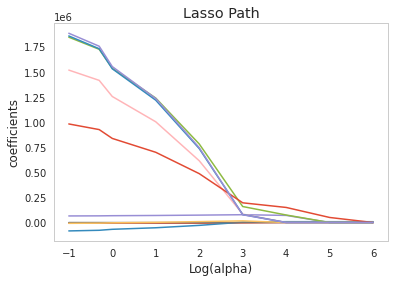

In [37]:

from itertools import cycle
from sklearn.linear_model import lasso_path

train_x_standard = X_train/X_train.std(axis=0)
list_alphas = [.1, .5, 1, 10, 100, 1000, 10000, 100000, 1000000]

# alphas_lasso, coefs_lasso, _ = lasso_path(predictors_bike_rental, response_bike_rental, alphas = [.1, .5, 1, 10, 100], fit_intercept=False)
alphas_lasso, coefs_lasso, _ = lasso_path(train_x_standard, y_train.values.reshape(-1),alphas = list_alphas, fit_intercept=False)
# print(alphas_lasso.shape)
# print(coefs_lasso.shape)

log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

From the graph we can see that with the increase of alpha value, the number of non-zero coefficients is reduced gradually
the variables with a coefficient of 0 means the variable is excluded from the model  

Since our lasso_model.score is 0, it means that the Lasso model does not do well in fitting the
relationship between the independent and dependent variables. Moreover, the plot of Lasso
Path is not very good.



We will use cross validation to search for the optimal alpha value. The code below is based on this link.

What is the search range of alphas?

The lassoCV function an argument called alphas, which is the list of alphas where to compute the models. Its default value is None. If None, alphas are set automatically.

As the automatically selected alpha values don't work well here (reason unknown), we will manually set alphas to list_alphas.

In [38]:
from sklearn.linear_model import LassoCV

start_time = time.time()
lasso_cv = LassoCV(cv=20, alphas=list_alphas).fit(X_train, y_train)
fit_time = time.time() - start_time

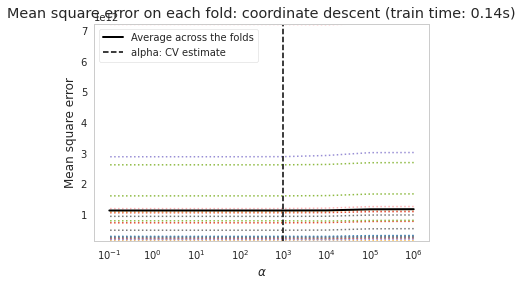

In [39]:
import matplotlib.pyplot as plt

ymin, ymax = np.min(lasso_cv.mse_path_), np.max(lasso_cv.mse_path_)
# lasso = model[-1]
plt.semilogx(lasso_cv.alphas_, lasso_cv.mse_path_, linestyle=":")
plt.plot(
    lasso_cv.alphas_,
    lasso_cv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso_cv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(
    f"Mean square error on each fold: coordinate descent (train time: {fit_time:.2f}s)"
)

Print the alphas_ values that have been compared.

In [40]:
print(lasso_cv.alphas_)

[1.e+06 1.e+05 1.e+04 1.e+03 1.e+02 1.e+01 1.e+00 5.e-01 1.e-01]


The optimal alpha value is as follows.

Note that this calculation contains some randomness and the mean square area of alpha=0.1 and alpha=1 is very close. Therefore, the optimal alpha might be 0.1 or 1 and might differ in different runs

In [41]:
print(lasso_cv.alpha_)

1000.0


Rerun the lasso model using the optimal alpha value:

In [42]:
# increase the max_iter to guarantee convergence
lasso_model = sklearn.linear_model.Lasso(max_iter=10e7, normalize=True, alpha = lasso_cv.alpha_)
lasso_model.fit(X=X_train, y=y_train)
print(lasso_model.score(X_train, y_train))

0.0


In [43]:
print(lasso_model.score(X_test, y_test))

-1.8247466817333802e-05


In [44]:
print(lasso_model.score(X_val, y_val))

-3.1094448034174604e-06


Since our lasso_model.score is 0, it means that the Lasso model does not do well in fitting the relationship between the independent and dependent variables. Moreover, the plot of Lasso Path is not very good.

### 5.5 Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
reg_random_forest = RandomForestRegressor(random_state=0)
reg_random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [46]:
print("R2 on the training data:")
print(reg_random_forest.score(X=X_train, y=y_train))
print("R2 on the testing data:")
print(reg_random_forest.score(X=X_test, y=y_test))

R2 on the training data:
0.8571295933379092
R2 on the testing data:
0.0005944052853968929


**From regression tree**: It looks like the R2 on the testing data is much lower than that on the training data. This indicates the overfitting problem, meaning that it fits very well to the training data but fails to generalise to unseen data.

CART tends to overfit, and this issue can be reduced by ensemble methods which combine many many trees.

If you prefer RMSE as the performance metric, you can calculate it as follows (see the documentation):

___

So - what do you think about the comparison of R2 on the training and testing data?

As with CART, it is not useful to visualise the trees in a random forest.

Calculate and plot the feature importance of the RF model.

Although the feature importance value differs from the CART, the order of the top-ranking variables is the same.

This indicates that these variables are indeed very important for the prediction of bike rental.

---

As this tree has over 20 layers and hundreds of leaves, it is not useful to visualise this tree. 

Alternatively, we will use the Permutation Feature Importance (PFI) to evaluate the relative importance of each variable.

We will use the package of **rfpimp** to compute the variable importance. If this package is not installed, install it using ```pip install rfpimp```.

An introduction of this package is [here](https://github.com/parrt/random-forest-importances).

A good introduction to the permutation feature importance is [here](https://christophm.github.io/interpretable-ml-book/feature-importance.html).

In [47]:
! pip install rfpimp

Note that the feature importance should be evaluated using the testing set, as it is unused in the model training.

We are interested in the top variables with a positive feature importance. These are days_since_2011, temp, hum, windspeed.

                                              Importance
Feature                                                 
Property_Type_D                                   0.0583
Latitude                                          0.0136
Tenure                                            0.0087
Building_Age                                      0.0005
Property_Type_F                                   0.0004
Property_Type_S                                   0.0003
Property_Type_T                                  -0.0004
Property_Type_O                                  -0.0118
Month                                            -0.0166
Longitude                                        -0.0265


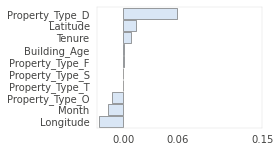

In [48]:
import rfpimp
imp = rfpimp.importances(reg_random_forest, X_test, y_test) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

#### Cross validation for RF

Cross validation is more robust

In [49]:
# we merge the training and validation data and use the merged data for cross validation
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

In [ ]:
%%time

from sklearn import model_selection

# values of n_estimators
list_n_estimators = [50, 100, 200, 300, 400]

# create a grid of the two hyperparameters
parameters = {'n_estimators':list_n_estimators}

random_state_rf = 300
rf = RandomForestRegressor(random_state_rf)

# rf = RandomForestRegressor()

# cv=5 by default, which means 5-fold cross-validation
clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(X_train_val, y_train_val)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

Sometimes, it is helpful to plot the influence of a single hyperparameter on the training and development score to find out whether the model is overfitting or underfitting. This plot is called **Validation curve**.

The function ```validation_score``` is helpful in this case. Similar to ```GridSearchCV```, this function is based on cross-validation.

In [ ]:
n_estimators_range = [10,20,30,40,50,70,100,150,200]

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv=5)

In [ ]:
# plotting the validation curve
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
lw = 2
plt.semilogx(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

It looks like the training and development scores do not change significantly with the number of trees, which means that the model is quite robust to this number of trees in the random forest.

You can pick up the point where the gap between training and cross-validation score reaches the minimum as the selected hyperparameter.

In [ ]:
rf_final_model = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'], random_state=random_state_rf)
rf_final_model.fit(X_train, y_train)

In [ ]:
rf_final_model.score(X_test, y_test)

### 5.6 GBDT and XGBoost


Last but not least, we will use GBDT to model and predict the bike rental.

We will use the XGBoost package. Although it is not part of sklearn, it has a sklearn-style interface, which is very convenient for users.

If the XGBoost package is not installed, install it using the following command:

In [ ]:
! pip install XGBoost

In [ ]:
import xgboost as xgb

random_state_xgb = 200

In [ ]:
xgb_model = xgb.XGBRegressor(random_state = random_state_xgb)

xgb_model.fit(X_train, y_train)

In [ ]:
print("R2 on the training data:")
print(xgb_model.score(X=X_train, y=y_train))
print("R2 on the testing data:")
print(xgb_model.score(X=X_test, y=y_test))


What is the relative feature importance in this model?

Can you compare the variable importance with the CART and RF?

In [ ]:
imp = rfpimp.importances(xgb_model, X_train, y_train) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

#### Cross validation for GBDT

In [ ]:
# merge training and validation data, as required by GridSearchCV
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])                       

# the index list of training and validation data in the merged dataset
# in X_train_val, the first n rows are from X_train and the remaining rows are from X_val. Here n=X_train.shape[0]
ind_train = list(range(X_train.shape[0]))
ind_val = list(range(X_train.shape[0], X_train_val.shape[0]))

In [ ]:
# values of n_estimators
parameters = {'n_estimators':[10,30,50,70,100]}

randomState_xgb = 10
xgb = RandomForestRegressor(random_state=randomState_xgb)

# CV: An iterable yielding (train, test) splits as arrays of indices.
clf = model_selection.GridSearchCV(xgb, parameters, cv=[(ind_train, ind_val)])

clf.fit(X_train_val, y_train_val)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

Now, print out the optimal number of trees. Note that if you change the random_state in the RandomForestRegressor, you may get a different best_params_ but the best_score_ is quite similar across different runs. This is because the randomisation in creating RandomForestRegressor.

We can create the final random forest model using the optimal parameters.

In [ ]:
xgb_final_model = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'], random_state=randomState_xgb)
xgb_final_model.fit(X_train, y_train)

After tuning the hyperparameters, we are able to evaluate the performance of the model to inspect bias and variance.

Note that the score on teh validation data is the same as the clf.best_score_.

In [ ]:
print('The score on the training data:')
print(xgb_final_model.score(X_train, y_train))
print('The score on the development data:')
print(xgb_final_model.score(X_val, y_val))
print('The score on the test data:')
print(xgb_final_model.score(X_test, y_test))

## 6. Results and Discussion

We have built a range of regression models. Now we can collate these models and compare their performance.



In [ ]:
# create a list of models
list_name_models = ['LR_VIF', 'LR_LASSO', 'RF', 'GBDT']
# use the models from above
list_reg_models = [lr, lasso_model, rf_final_model, xgb_final_model]

dict_models = dict()

for name, model in zip(list_name_models, list_reg_models):
    if name == 'LR_VIF':
        dict_models[name] = [model.score(train_x_VIF, y_train), model.score(test_x_VIF, y_test), model.score(train_x_VIF, y_train) - model.score(test_x_VIF, y_test)]
    else:
        dict_models[name] = [model.score(X_train, y_train), model.score(X_test, y_test), model.score(X_train, y_train) - model.score(X_test, y_test)]
#     dict_models[name] = [model.score(X_train, y_train), model.score(X_test, y_test), model.score(X_train, y_train) - model.score(X_test, y_test)]

# transform dict_models to dataframe
df_models = pd.DataFrame.from_dict(dict_models, orient='index', columns=['R2_train_data', 'R2_test_data', 'R2_diff'])
print(df_models)

high bias, high variance, good balance
overfitting, underfitting, improvement needed

## 7. Conclusion

In [ ]:
end_time = time.time()
run_time = end_time - start_time
print("Total run time: ", run_time, "seconds")

*(word count: )*

## Bibliography